In [7]:
from fastai.vision.all import *
from ipywidgets import widgets

In [13]:
path = Path('datasets')
fls = get_image_files(path)

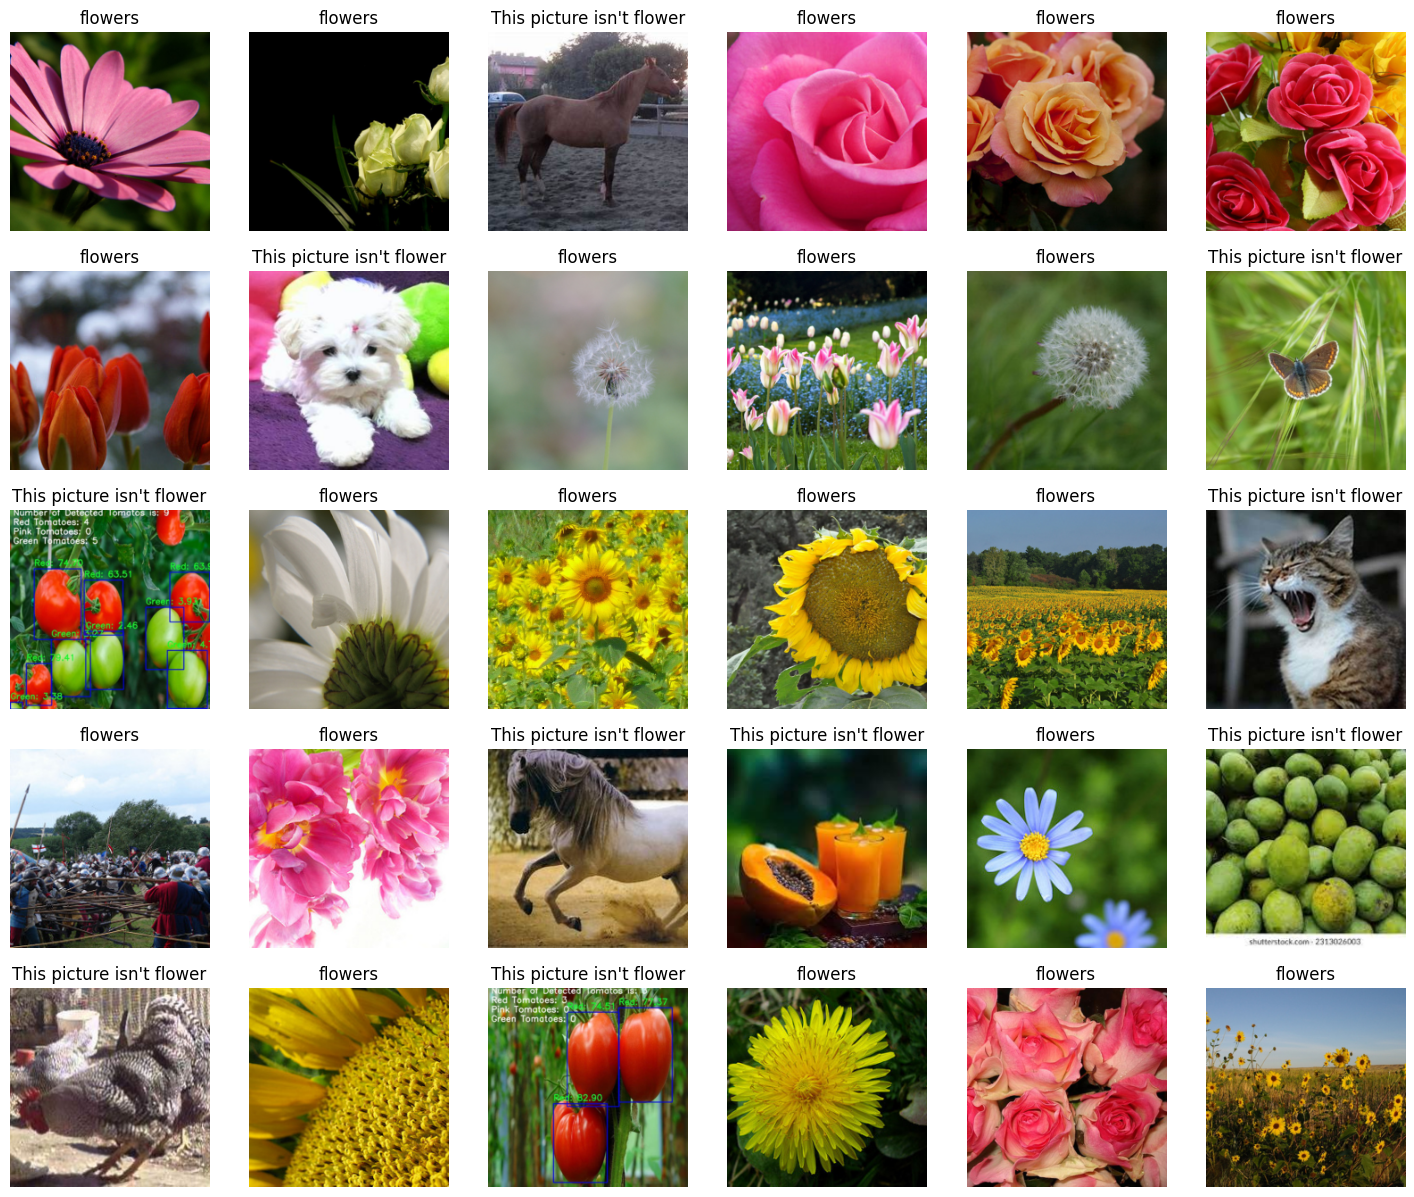

In [14]:
which = DataBlock(
  blocks = (ImageBlock,CategoryBlock),
  get_items = get_image_files,
  splitter = RandomSplitter(valid_pct=0.2,seed=12),
  get_y = parent_label,
  item_tfms = Resize(224,224)
)
# dataloader
dls = which.dataloaders(path)

#show any img with label
dls.train.show_batch(max_n = 30, nrows = 5)

In [15]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.784746,0.383191,0.899498,00:27


c:\Users\Lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,time
0,0.137497,0.094269,0.959799,00:16
1,0.093403,0.109780,0.964824,00:16
2,0.062542,0.077950,0.969849,00:16
3,0.043839,0.072349,0.974874,00:16
4,0.032560,0.074737,0.974874,00:16


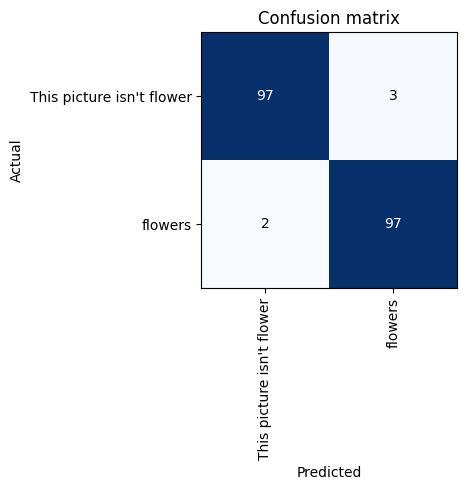

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

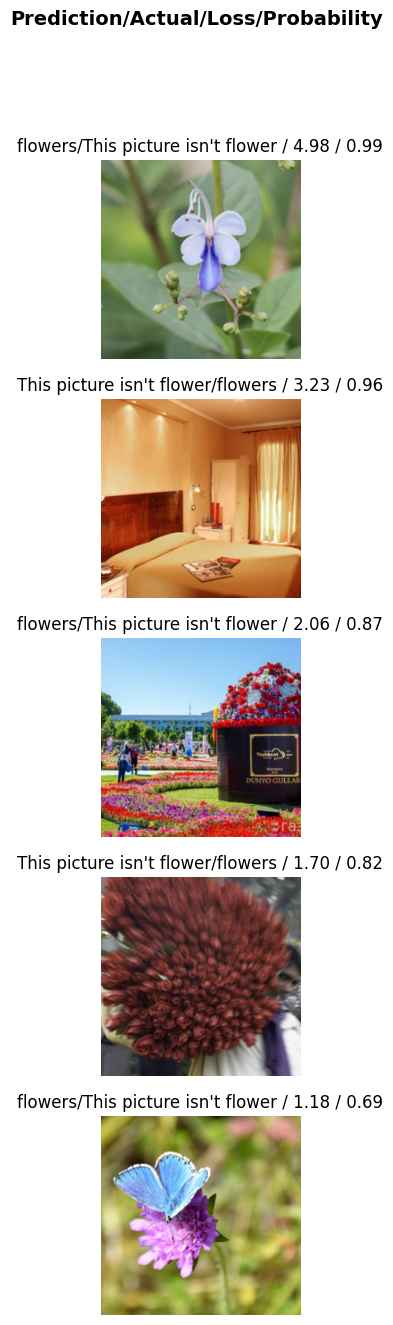

In [18]:
interp.plot_top_losses(5,nrows=5)

In [19]:
learn.export(fname='which.pkl')